# Лабораторная работа № 3. Статистический анализ данных о тепловой нагрузке блоков усиления мощности.

В работе проводится анализ данных о температуре и техническом состоянии совокупности блоков усиления мощности. Определяется взаимосвязь их технического состоянии с общим состоянием системы.

Составитель работы - Львов К.В., аспирант физического факультета МГУ им. М.В. Ломоносова. 2021.

## Введение

Современные радиолокационные станции (РЛС) – это структурно-сложные радиотехнические и информационные системы, характеризующиеся высокой надежностью функционирования и большим числом цифровых компонентов в своем составе. Одним из таких компонентов является блок усиления мощности (БУМ), задача которого усиливать передаваемый или принимаемый сигнал.

Функционирование БУМ приводит к их нагреву, что может сказаться на снижении их работоспособности или даже привести к отказу. Под системой в этой работе мы будем понимать несколько БУМ, объединенных в единое целое. Тогда техническое состояние всей системы будет определяться техническим состоянием ее компонент, т.е. состоянием БУМ в данной работе. Техническое же состояние БУМ напрямую зависит от их температуры: при достижении определенного порога блок перестает работать и начинает охлаждаться. После охлаждения до определенной температуры он снова переходит в рабоспособное состояние.

Основная задача - спрогнозировать увеличение температуры блоков усиления мощности на основании истории их функционирования и режима работы блоков, который задает интенсивность нагрева, и возможный выход из строя всей системы блоков. Соответственно, необходимо определить критерий, на основании которого делается вывод о техническом состоянии системы, т.е. установить соответствие между состояниями блоков и состоянием системы. Именно этой задаче и будет посвящена данная лабораторная работа.

## Описание файла с данными

Подключим стандартные пакеты для работы с данными и построения графиков

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Mounted at /content/drive


Загрузим файл с данными и выведем на экран первые 5 строк. Получим информацию по каждой колонке.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab3_data.csv")
df.head()

,mode,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,system_state
0,3,28.286114,28.043155,27.282141,28.704673,26.530050,30.627461,29.912560,29.724531,29.358333,1.0
1,4,34.142434,35.346311,34.829661,35.079161,35.740529,38.070576,38.675433,36.362013,35.819681,1.0
2,2,34.813586,36.781106,34.445407,34.423135,35.091298,37.398229,38.883147,36.309084,35.741195,1.0
3,4,39.946499,43.133120,40.372435,39.102817,42.374502,41.829684,44.227679,42.699515,41.328171,1.0
4,4,43.950857,47.014358,44.162152,43.810740,45.837267,45.189761,47.661803,46.020946,46.441315,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205950 entries, 0 to 1205949
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   mode          1205950 non-null  int64  
 1   temp1         1205950 non-null  float64
 2   temp2         1205950 non-null  float64
 3   temp3         1205950 non-null  float64
 4   temp4         1205950 non-null  float64
 5   temp5         1205950 non-null  float64
 6   temp6         1205950 non-null  float64
 7   temp7         1205950 non-null  float64
 8   temp8         1205950 non-null  float64
 9   temp9         1205950 non-null  float64
 10  system_state  1205950 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 101.2 MB


Первая колонка **mode** обозначает номер режима работы блоков. Этот режим определяет интенсивность нагрева блоков. Следующие 9 колонок содержат в себе информацию о температуре каждого из 9-ти БУМ в каждый момент времени. Последняя колонка - бинарный признак работоспособности всей системы блоков.

## Определение температурных порогов отключения и включения блоков

Посмотрим на динамику температуры для каждого блока. Отчетливо видно, что существуют области почти линейного уменьшения температуры - периоды охлаждения блоков. В этом задании требуется определить температурные пороги, достижение которых приводит к отлючению блоков или, наоборот, к возврату их в работоспособное состояние. Также требуется сделать вывод о похожести блоков.

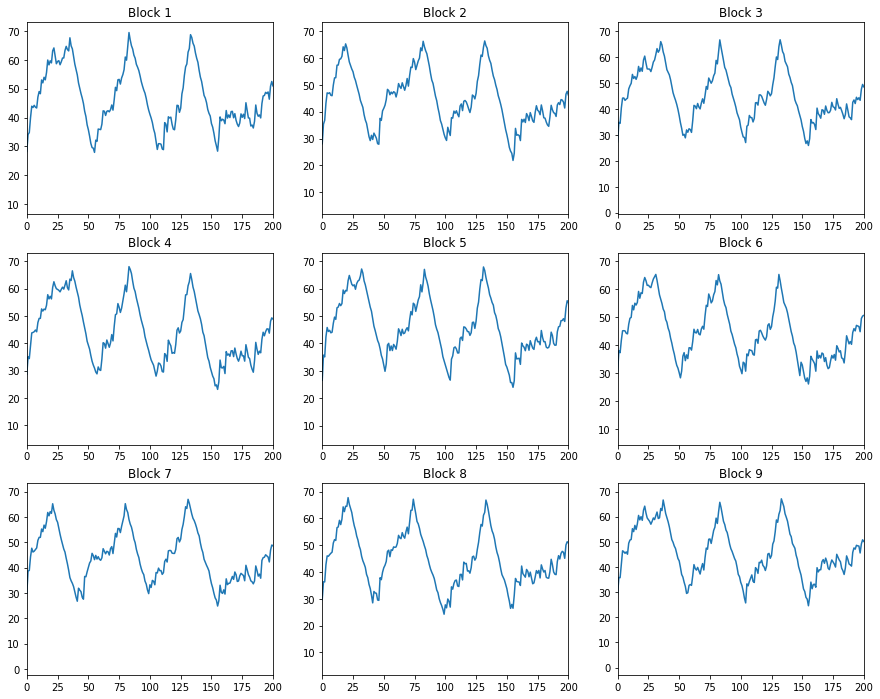

In [ ]:
plt.figure(figsize=(15,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.plot(df['temp'+str(i+1)])
    plt.xlim(0,200)
    plt.title('Block '+str(i+1))
plt.show()

Напишите функцию, которая бы по данным о температуре для конкретного блока (тип **Series**) определяла области, в которых происходит охлаждение блока. Параметр **threshold** задает минимальную длительность такой области.

In [ ]:
def find_decreasing_regions(series, threshold = 10):
    cool_h = []
    cool_l = []
    arr = 0
    # напишите свой код здесь
    for index in range(len(series)-1):
        if(series[index] > series[index+1]):
            arr+=1
            continue
        if(arr > threshold):
            cool_h.append(index-arr)
            cool_l.append(index)
        arr = 0
    dt = pd.DataFrame({'start_cooling': pd.Series(cool_h), 'finish_cooling': pd.Series(cool_l)})
    return dt

Определим области охлаждения для каждого блока

In [ ]:
block_names = ['temp1','temp2','temp3','temp4','temp5','temp6','temp7','temp8','temp9']
decreasing_regions = [find_decreasing_regions(df[name]) for name in block_names]
decreasing_regions

[       start_cooling  finish_cooling
 0                 35              55
 1                 83             106
 2                133             155
 3                287             306
 4                365             383
 ...              ...             ...
 18134        1205679         1205699
 18135        1205734         1205755
 18136        1205791         1205814
 18137        1205859         1205879
 18138        1205915         1205937
 
 [18139 rows x 2 columns],        start_cooling  finish_cooling
 0                 19              39
 1                 82             101
 2                132             155
 3                268             288
 4                356             375
 ...              ...             ...
 18113        1205679         1205702
 18114        1205739         1205761
 18115        1205792         1205815
 18116        1205853         1205875
 18117        1205920         1205945
 
 [18118 rows x 2 columns],        start_cooling  finish_co

Напишите функции, которые бы выдавали список значений температур, при которых произошло отключение блока и его повторное включение после охлаждения, для каждого блока.

In [ ]:
def find_max_temp(regions, series):
    
    # напишите свой код здесь
    return [series[regions['start_cooling'][index]] for index in range(len(regions)) ]

def find_min_temp(regions, series):
    
    # напишите свой код здесь
    
    return[series[regions['finish_cooling'][index]] for index in range(len(regions)) ]

Определим значения температур, при которых произошло отключение блоков и их повторное включение после охлаждения.

In [ ]:
max_temp = [find_max_temp(decreasing_regions[i], df['temp'+str(i+1)]) for i in range(9)]
min_temp = [find_min_temp(decreasing_regions[i], df['temp'+str(i+1)]) for i in range(9)] 
for i in range(9):
    print('temp'+str(i))
    for j in range (5):
      print(min_temp[i][j], max_temp[i][j])

temp0
27.946372290239267 67.65362001012114
28.96536925003958 69.47289397840382
28.37145418838127 68.73506863930571
25.59436412568269 65.2157984388604
28.91792755800305 65.67134686182747
temp1
29.22819752888217 65.25685097682317
29.2777598575736 66.22622090993873
21.834235535589595 66.34663683829085
27.788737343019072 65.04752272803822
28.655621386112237 65.59031770542633
temp2
29.836665366420693 65.93097268845793
27.03376533097164 66.59796813179324
26.67441895756032 66.65035552735976
27.648391405055186 65.34586028266212
29.50488099285625 66.81346792301098
temp3
28.839515626708533 66.5235599036498
28.019991993804588 68.05984339619835
24.442864741615228 65.54337835820476
29.666947919353234 67.42749278077223
22.22331343959197 65.17332697693385
temp4
29.82054274254105 67.21660922519115
26.596127780176936 67.081457192718
23.972029398623924 67.95853715994414
22.95028365583841 66.06489081693806
20.96381469161832 65.83547198428518
temp5
28.413287768915648 65.33113717475864
29.88545866969998 65

Примените функцию ниже к полученным значениям температур. Наглядно сравните распределение верхних и нижних порогов температур для каждого блока. На основании этих распределений сделайте вывод о похожести блоков.

In [ ]:
def hist_min_max_temp(min_max_temp, size=(15,12)):
    plt.figure(figsize=size)
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.hist(min_max_temp[i], bins=100)
        plt.title('Block '+str(i+1))
    plt.show()

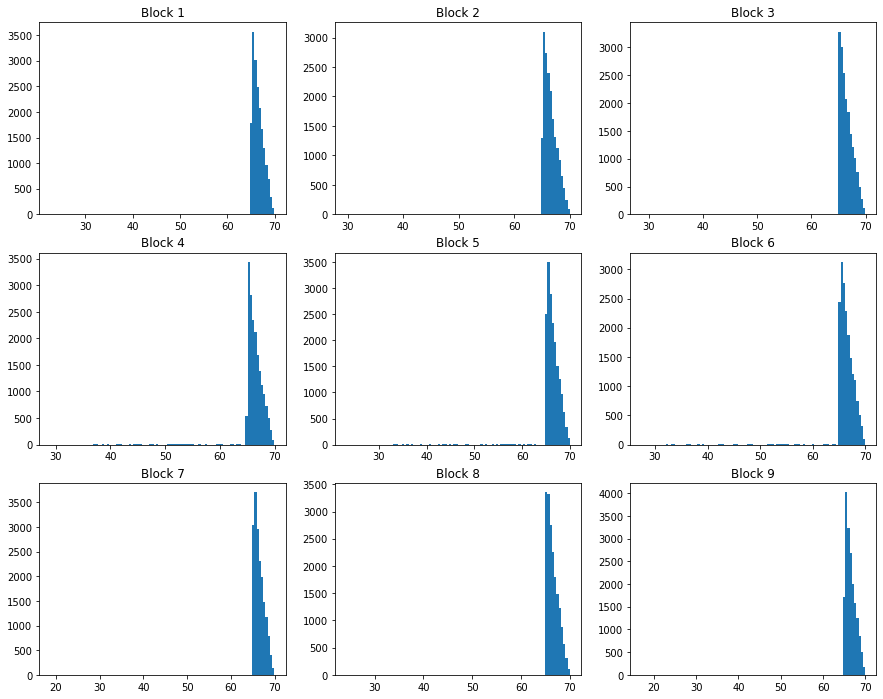

In [ ]:
hist_min_max_temp(max_temp)

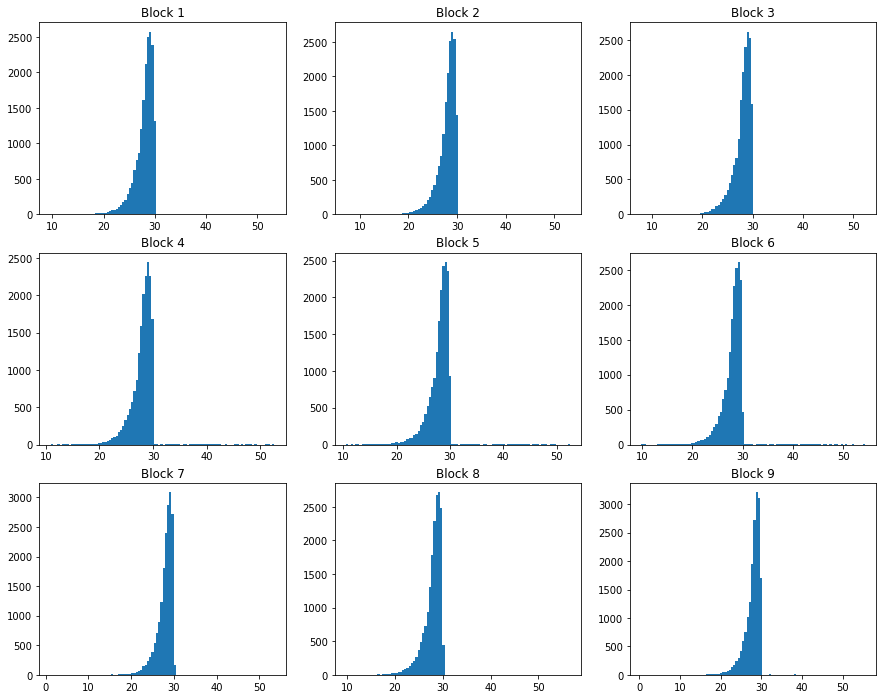

In [ ]:
hist_min_max_temp(min_temp)

Вывод: напишите свой вывод здесь.

Определите средние значения температурных порогов для каждого блока и всех блоков в целом.

In [ ]:
mean_max_temp = [np.mean(max_temp[index]) for index in range(9)] # напишите свой код здесь
mean_min_temp = [np.mean(min_temp[index]) for index in range(9)] # напишите свой код здесь

print('Mean max_temp: ', mean_max_temp)
print('Mean min_temp: ', mean_min_temp)

Mean max_temp:  [66.3874066011156, 66.40183034048492, 66.39506527998577, 66.38820141569298, 66.39541639802462, 66.39971511105749, 66.4246636060408, 66.40085897028452, 66.40883669469126]
Mean min_temp:  [27.938318777834755, 27.901851690432796, 27.935067094184728, 27.89868542144345, 27.936297693616602, 27.928457383168343, 27.906019110694423, 27.91538073520269, 27.920073491858265]


In [ ]:
max_temp_thres = np.mean(mean_max_temp) # напишите свой код здесь
min_temp_thres = np.mean(mean_min_temp) # напишите свой код здесь

print('Max_temp threshold: ', max_temp_thres)
print('Min_temp threshold: ', min_temp_thres)

Max_temp threshold:  66.40022160193088
Min_temp threshold:  27.92001682204845


## Определение технического состояния каждого блока

Напишите функцию, которая бы по известной текущей температуре **temp**, верхнего **max_temp** и нижнего **min_temp** температурных порогов определяла состояние блока в диапазоне от 0 до 1 (0 - блок имеет нижнюю температуру, 1 - верхнюю). При этом значения температуры, выше верхнего порога должны соответствовать состоянию 0, а температуры, ниже нижнего порога - состоянию 1. 

In [ ]:
def get_state(temp, max_temp, min_temp):
    
    # напишите свой код здесь
    if(temp > max_temp):
        return 0
    if(temp < min_temp):
        return 1
    return (max_temp - temp)/(max_temp - min_temp);

Добавьте в DataFrame новые столбцы 'state1' и т.д., содержащие состояния блоков. Учтите, что в те промежутки, когда блок остывает и находится в выключенном состоянии, его состояние должно быть равно 0.

In [ ]:
for i in range(9):
    temp = df["temp"+str(i+1)]
    state = []
    for index in range(len(temp)):
        state.append(get_state(temp[index],mean_max_temp[i],mean_min_temp[i]))
    r = pd.DataFrame(state)
    for idx, row in decreasing_regions[i].iterrows():
        r.iloc[row['start_cooling']:row['finish_cooling']] = 0
    df["state"+str(i+1)] = r
    # напишите скод здесь
df

,mode,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,system_state,state1,state2,state3,state4,state5,state6,state7,state8,state9
0,3,28.286114,28.043155,27.282141,28.704673,26.530050,30.627461,29.912560,29.724531,29.358333,1.0,0.990954,0.996330,1.000000,0.979060,1.000000,0.929844,0.947907,0.952991,0.962632
1,4,34.142434,35.346311,34.829661,35.079161,35.740529,38.070576,38.675433,36.362013,35.819681,1.0,0.838641,0.806637,0.820733,0.813443,0.797077,0.736372,0.720410,0.780524,0.794755
2,2,34.813586,36.781106,34.445407,34.423135,35.091298,37.398229,38.883147,36.309084,35.741195,1.0,0.821185,0.769370,0.830724,0.830488,0.813958,0.753848,0.715018,0.781899,0.796795
3,4,39.946499,43.133120,40.372435,39.102817,42.374502,41.829684,44.227679,42.699515,41.328171,1.0,0.687686,0.604382,0.676615,0.708904,0.624583,0.638659,0.576266,0.615852,0.651636
4,4,43.950857,47.014358,44.162152,43.810740,45.837267,45.189761,47.661803,46.020946,46.441315,1.0,0.583539,0.503571,0.578079,0.586587,0.534546,0.551319,0.487111,0.529548,0.518788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205945,2,18.943890,19.855945,31.708594,34.236802,23.722121,30.109175,31.773575,30.144254,23.672364,1.0,1.000000,1.000000,0.901884,0.835329,1.000000,0.943316,0.899593,0.942085,1.000000
1205946,4,29.037470,32.038964,38.969345,40.958161,32.260785,37.292509,39.110470,37.154069,30.412720,1.0,0.971413,0.892542,0.713097,0.660700,0.887556,0.756596,0.709116,0.759944,0.935237
1205947,2,30.074717,31.179757,38.526112,40.394142,32.690133,37.884521,40.008456,38.227679,30.199773,1.0,0.944436,0.914860,0.724622,0.675354,0.876393,0.741208,0.685803,0.732047,0.940770
1205948,0,28.349375,28.579212,37.372826,39.174076,31.710552,35.129198,38.392526,36.336950,29.113737,1.0,0.989309,0.982406,0.754608,0.707053,0.901863,0.812828,0.727755,0.781175,0.968987


Построим сравнительный график столбцов 'temp9' и 'state9' - проверим правильность перевода температуры в состояние.

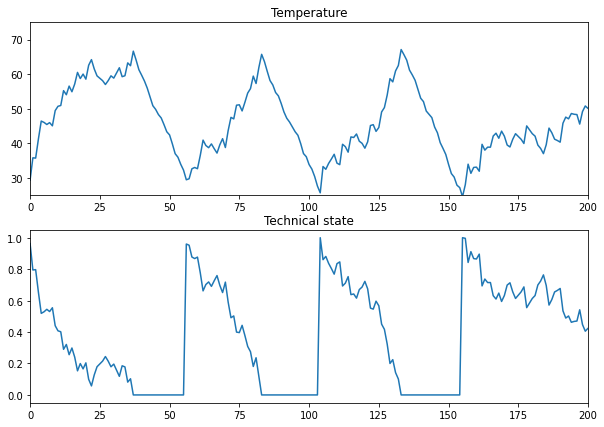

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(df['temp9'])
plt.xlim(0,200)
plt.ylim(25,75)
plt.title('Temperature')
plt.subplot(2,1,2)
plt.plot(df['state9'])
plt.xlim(0,200)
plt.title('Technical state')
plt.show()

## Корреляции технического состояния блоков с состоянием системы

Построим друг над другом графики состояния системы и состояния блоков, чтобы определить возможную взаимосвязь этих величин.

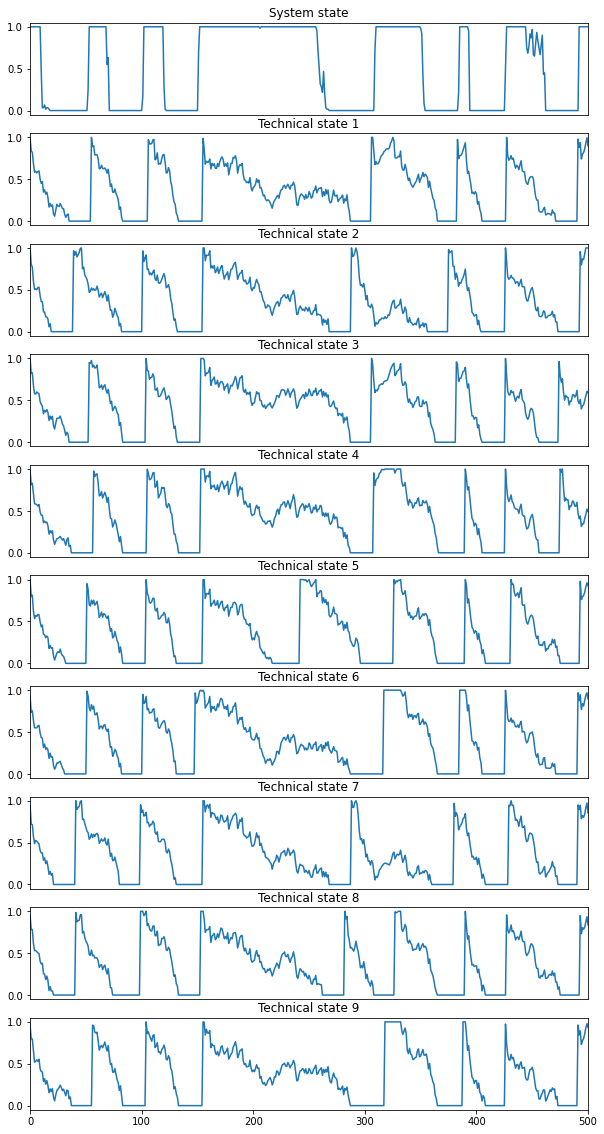

In [ ]:
plt.figure(figsize=(10,20))
plt.subplot(10,1,1)
plt.plot(df['system_state'])
plt.xlim(0,500)
plt.xticks([])
plt.title('System state')
for i in range(9):
    plt.subplot(10,1,i+2)
    plt.plot(df['state'+str(i+1)])
    plt.xlim(0,500)
    if i < 8:
        plt.xticks([])
    plt.title('Technical state '+str(i+1))
plt.show()

Наглядно видно, что состояние системы становится равным 0, когда какая-то часть блоков отключается и начинает охлаждаться. Поскольку блоки идентичные, то можно предположить, что каждый из них одинаковым образом влияет на состояния системы. Поэтому определим взаимосвязь состояния системы со средним значением состояния блоков.

Определите среднее состояние блоков с помощью метода **pd.DataFrame.agg()**.

In [ ]:
sum_state = df[["state"+str(i+1) for i in range(9)]].agg(np.mean, axis = 1) # напишите свой код здесь
sum_state

0          0.973302
1          0.789844
2          0.790365
3          0.642732
4          0.541454
             ...   
1205945    0.946912
1205946    0.809578
1205947    0.803943
1205948    0.847332
1205949    0.850027
Length: 1205950, dtype: float64

Сравним на графиках состояние системы и среднее состояние блоков.

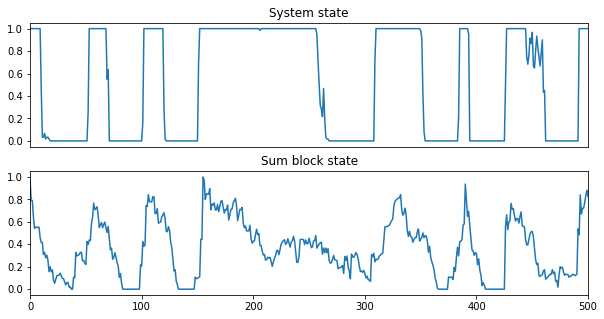

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(df['system_state'])
plt.xlim(0,500)
plt.xticks([])
plt.title('System state')
plt.subplot(2,1,2)
plt.plot(sum_state)
plt.xlim(0,500)
plt.title('Sum block state')
plt.show()

Для того, чтобы по состоянию блоков можно было определять состояние системы, нужно выбрать пороговое значение состояния блоков, выше которого состояние системы будет прогнозироваться равным 1, а ниже - равным 0. Сделаем это обычным перебором. Но для начала приведем значения состояния системы либо к значению 0, либо к значению 1.

Напишите функцию, которая будет рассчитывать точность соответствия состояния системы **system_state** и среднего состояния блоков **sum_state** для определенного порогового значения **threshold**. Точность - относительное число точных совпадений состояний блоков и системы (1 и 1 или 0 и 0).

In [ ]:
system_state = np.ones(len(df))
system_state[df['system_state'] < 0.5] = 0.

In [ ]:
def accuracy(system_state, sum_state, threshold):
     # напишите свой код здесь
    sum_state = sum_state.apply(lambda x: 1 if x > threshold else 0)
    return np.count_nonzero(system_state == sum_state)/system_state.size

Определим точность для каждого значения порога в интервале от 0 до 1.

In [ ]:
acc = []
thresholds = np.linspace(0., 1., num = 100)

for thres in thresholds:
    # напишите свой код здесь
    acc.append(accuracy(system_state, sum_state, thres))
acc

[0.464704175131639,
 0.47102782039056346,
 0.4831784070649695,
 0.49463078900451923,
 0.5055790041046477,
 0.516455906132095,
 0.5280194037895435,
 0.5402305236535512,
 0.5531481404701687,
 0.5673875367967163,
 0.5814279198971765,
 0.6001998424478627,
 0.6126796301670882,
 0.6256436834031261,
 0.6382262946224968,
 0.6509531904307807,
 0.6635523860856586,
 0.6764666860151748,
 0.6892930884365024,
 0.7017032215265973,
 0.714224470334591,
 0.7262117003192504,
 0.7387445582320992,
 0.7490882706579874,
 0.7590165429744186,
 0.7687366806252333,
 0.778206393299888,
 0.7869662921348315,
 0.7948322898959327,
 0.802030764127866,
 0.8083917243666818,
 0.8142319333305693,
 0.8194245200878975,
 0.8240117749492102,
 0.8268642978564618,
 0.828802189145487,
 0.8300684107964675,
 0.8308470500435341,
 0.8306828641320121,
 0.8297748662879887,
 0.8282797794270077,
 0.8256809983830176,
 0.8225697582818525,
 0.8187312906836933,
 0.8143306107218375,
 0.8093345495252705,
 0.8036684771342095,
 0.79746755669803

Построим график зависимости точности от порога. На графике виден максимум, соответствующий оптимальному значению порога.

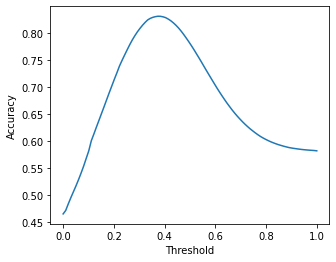

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(thresholds, acc)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

Определите максимальное значение точности и оптимальное значение порога.

In [ ]:
max_accuracy = max(acc) # напишите свой код здесь
optimal_threshold = thresholds[acc.index(max_accuracy)] # напишите свой код здесь

print('Maximum accuracy {:.3f} for the threshold {:.3f}'.format(max_accuracy, optimal_threshold))

Maximum accuracy 0.831 for the threshold 0.374


## Выводы

Напишите ниже выводы по результатам лабораторной работы.

По результатам проделанной нами работы получилось, что максимальная точность прогнозирования работаспособности системы достигается при threshold = 0.374